In [1]:
import time

import numpy as np
import numpy.linalg as la
import pandas as pd

from core.factorization.qr import (
    classical_gram_schmidt, 
    householder_reflection,
    modified_gram_schmidt
)

# Compare QR algo on well-conditioned matrix
1. complexity measured as time as a function of problem scale N
2. accuracy of Q measured as matrix norm of (Q.T * Q - I)
3. accuracy of QR measured as matrix norm of (Q * R - A)

In [2]:
# generate matrix for a certain condition number
def gen(cond, n=100):
    log_cond_P = np.log(cond)
    exp_vec = np.arange(-log_cond_P/4., log_cond_P * (n + 1)/(4 * (n - 1)), log_cond_P/(2.*(n-1)))
    s = np.exp(exp_vec)
    S = np.diag(s)
    U, _ = la.qr((np.random.rand(n, n) - 5.) * 200)
    V, _ = la.qr((np.random.rand(n, n) - 5.) * 200)
    P = U.dot(S).dot(V.T)
    P = P.dot(P.T)
    return P

In [11]:
perf = []

for N in (16, 32, 64, 128, 256, 512, 1024, 2048):
    N = int(N)
    A = gen(cond=2, n=N)
    for func in (classical_gram_schmidt, modified_gram_schmidt, householder_reflection):
        start = time.perf_counter()
        Q, R = func(A)
        elapsed = time.perf_counter() - start
        error_q = np.linalg.norm(Q.T * Q - np.identity(N))
        error_qr = np.linalg.norm(Q * R - A)
        perf.append([N, func.__name__, elapsed, error_q, error_qr])


In [12]:
# well conditioned perf
perf = pd.DataFrame(perf, columns=["N", "func", "elapsed", "error_q", "error_qr"])
perf

,N,func,elapsed,error_q,error_qr
0,16,classical_gram_schmidt,0.001168,1.023806e-15,1.875812e-16
1,16,modified_gram_schmidt,0.003193,7.720890e-16,5.790558e-16
2,16,house_qr,0.001144,3.351623e-15,3.515074e-15
3,32,classical_gram_schmidt,0.002119,1.362060e-15,4.239066e-16
4,32,modified_gram_schmidt,0.007358,1.288222e-15,1.543698e-15
5,32,house_qr,0.001927,3.859046e-15,4.986300e-15
6,64,classical_gram_schmidt,0.003284,2.120137e-15,6.784100e-16
7,64,modified_gram_schmidt,0.029145,2.305604e-15,2.684459e-15
8,64,house_qr,0.003607,5.879531e-15,7.121416e-15
9,128,classical_gram_schmidt,0.010205,3.823652e-15,1.300879e-15


<AxesSubplot:title={'center':'Time Complexity Comparison'}, xlabel='N'>

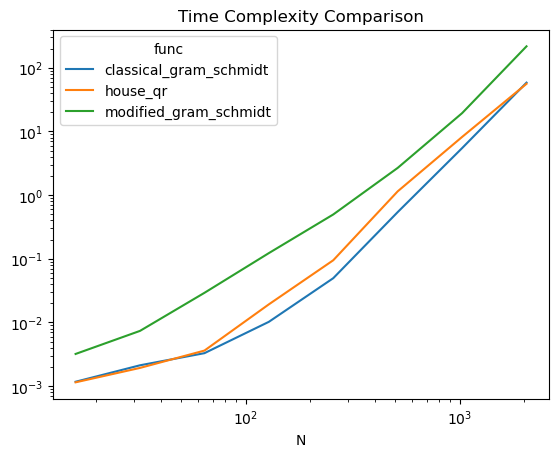

In [19]:
pd.pivot(perf, index="N", columns="func", values="elapsed").plot(loglog=True, title="Time Complexity Comparison")

<AxesSubplot:title={'center':'Error of Orthogonal Matrix Q'}, xlabel='N'>

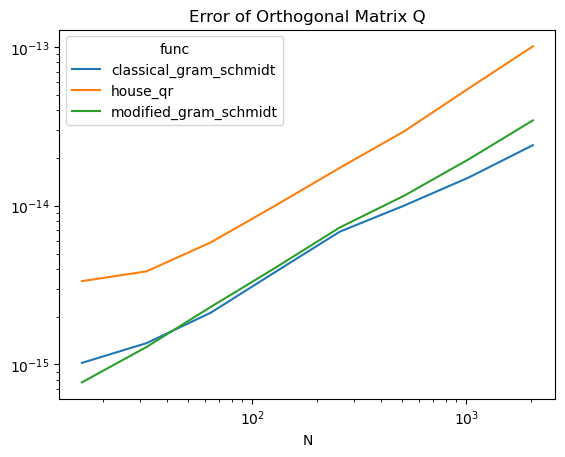

In [20]:
pd.pivot(perf, index="N", columns="func", values="error_q").plot(loglog=True, title="Error of Orthogonal Matrix Q")

<AxesSubplot:title={'center':'Error of QR Matrix Multiplication'}, xlabel='N'>

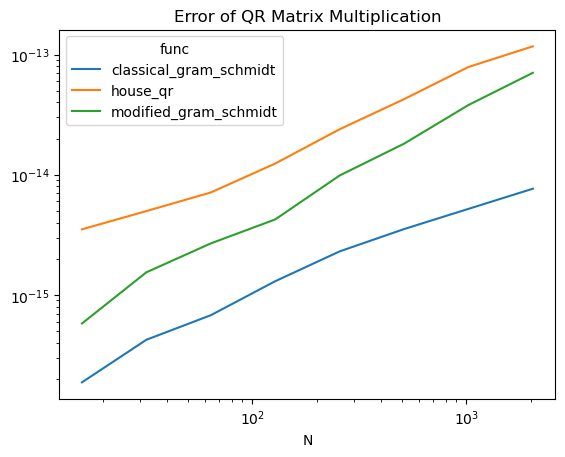

In [21]:
pd.pivot(perf, index="N", columns="func", values="error_qr").plot(loglog=True, title="Error of QR Matrix Multiplication")

# Comparison on Ill-conditioned Matrix

In [22]:
perf = []

for cond in (8192, 4096, 2048, 1024, 512, 256, 128, 64, 32, 16, 8):
    N = 100
    A = gen(cond, N)
    for func in (classical_gram_schmidt, modified_gram_schmidt, householder_reflection):
        start = time.perf_counter()
        Q, R = func(A)
        elapsed = time.perf_counter() - start
        error_q = np.linalg.norm(Q.T * Q - np.identity(N))
        error_qr = np.linalg.norm(Q * R - A)
        perf.append([cond, func.__name__, elapsed, error_q, error_qr])

In [23]:
# ill conditioned perf
perf = pd.DataFrame(perf, columns=["cond", "func", "elapsed", "error_q", "error_qr"])
perf

,cond,func,elapsed,error_q,error_qr
0,8192,classical_gram_schmidt,0.004928,6.507478e-10,7.091343e-14
1,8192,modified_gram_schmidt,0.071576,7.500496e-10,7.134926e-14
2,8192,house_qr,0.006009,9.354927e-15,1.700954e-13
3,4096,classical_gram_schmidt,0.003415,1.501858e-10,5.017518e-14
4,4096,modified_gram_schmidt,0.069567,1.596059e-10,5.062588e-14
5,4096,house_qr,0.005996,9.144397e-15,1.302159e-13
6,2048,classical_gram_schmidt,0.003272,4.144751e-11,3.554545e-14
7,2048,modified_gram_schmidt,0.072904,5.608635e-11,3.819157e-14
8,2048,house_qr,0.006165,9.632626e-15,1.036103e-13
9,1024,classical_gram_schmidt,0.003393,1.254327e-11,2.727271e-14


<AxesSubplot:title={'center':'Error of Orthogonal Matrix Q'}, xlabel='cond'>

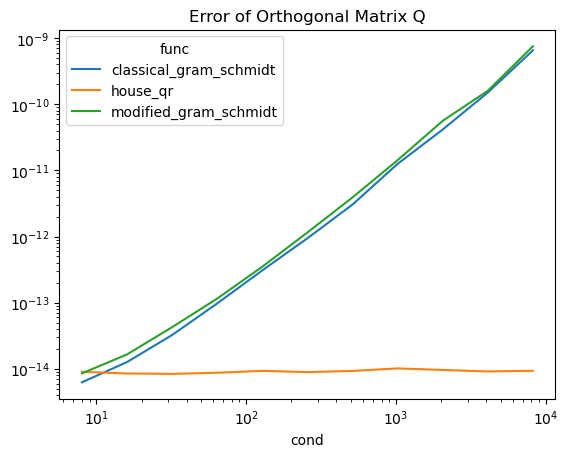

In [24]:
pd.pivot(perf, index="cond", columns="func", values="error_q").plot(loglog=True, title="Error of Orthogonal Matrix Q")

<AxesSubplot:xlabel='cond'>

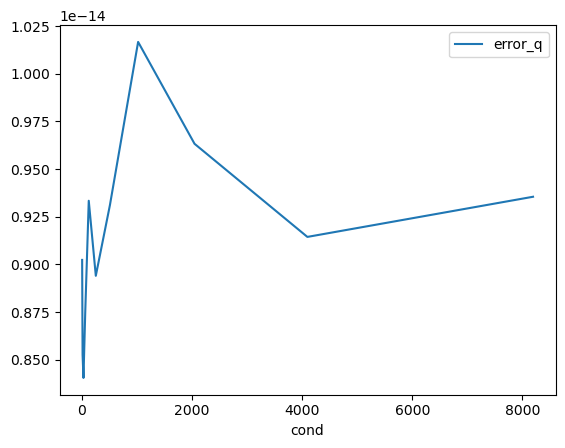

In [28]:
perf.loc[perf["func"] == "house_qr", ["cond", "error_q"]].set_index("cond").plot()

<AxesSubplot:title={'center':'Error of QR Matrix Multiplication'}, xlabel='cond'>

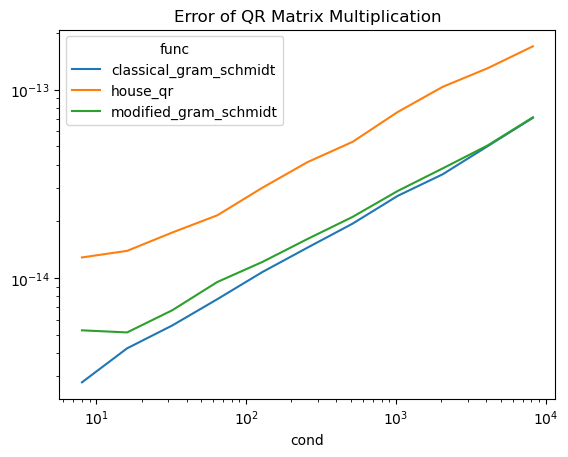

In [25]:
pd.pivot(perf, index="cond", columns="func", values="error_qr").plot(loglog=True, title="Error of QR Matrix Multiplication")